# K Nearest Neighbors

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
eeg_data = pd.read_csv("data.csv")

In [3]:
eeg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Signal to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [4]:
eeg_data.head(1)

,Signal,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4


In [5]:
# Check the lables of the Class
eeg_data['y'].unique()

array([4, 1, 5, 2, 3])

In [6]:
# Convert the 5 classes into binary class
def convert_binary_class(y):
    if y == 2 or y == 3 or y == 4 or y == 5 :
        return 0
    else :
        return 1

In [7]:
# Apply above function to convert into binary class
eeg_data['y'] = eeg_data['y'].apply(convert_binary_class)

In [8]:
eeg_data.head()

,Signal,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [9]:
# Remove unnecessory columns that is the name of the signal
del eeg_data['Signal']
eeg_data.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0


### Standardize the Variables



In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(eeg_data.drop('y',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(eeg_data.drop('y',axis=1))

In [13]:
eeg_feature = pd.DataFrame(scaled_features)
eeg_feature.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(eeg_feature,eeg_data['y'],
                                                    test_size=0.30)

## Training and Predicting

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[2755,   12],
       [ 169,  514]])

In [25]:
# Accuracy = TP + TN / TP + TN + FN + FP
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm [0][1] + cm [1][0] + cm[1][1])
# Accuracy
accuracy * 100

94.7536231884058

In [26]:
target_names = ['Seizure Activity', 'Non Seizure Activity ']
print(classification_report(y_test, predictions, target_names=target_names))

                       precision    recall  f1-score   support

     Seizure Activity       0.94      1.00      0.97      2767
Non Seizure Activity        0.98      0.75      0.85       683

          avg / total       0.95      0.95      0.94      3450



## Choosing a K Value

In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

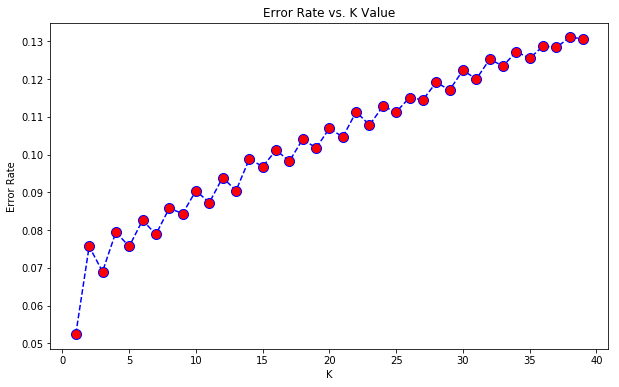

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report! Good K is k=1 as shown in the graph

In [29]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2755   12]
 [ 169  514]]


             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2767
          1       0.98      0.75      0.85       683

avg / total       0.95      0.95      0.94      3450



In [30]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[2755   12]
 [ 226  457]]


             precision    recall  f1-score   support

          0       0.92      1.00      0.96      2767
          1       0.97      0.67      0.79       683

avg / total       0.93      0.93      0.93      3450



In [31]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[2757   10]
 [ 251  432]]


             precision    recall  f1-score   support

          0       0.92      1.00      0.95      2767
          1       0.98      0.63      0.77       683

avg / total       0.93      0.92      0.92      3450



In [32]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[2763    4]
 [ 308  375]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95      2767
          1       0.99      0.55      0.71       683

avg / total       0.92      0.91      0.90      3450

